# Importing the Dependencies

In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Data Collection & Analysis

In [64]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv(r"C:\Users\ma516\OneDrive\Desktop\machine learning projects\unsupervised machine learning projects\Project 1 . Mall customer Segmentaion\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
# checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

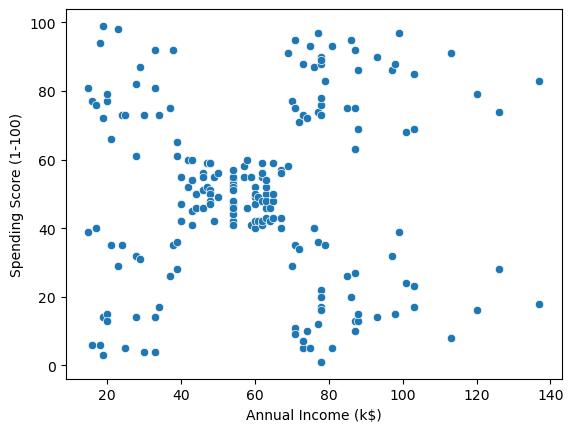

In [67]:
sns.scatterplot(x = "Annual Income (k$)" , y = "Spending Score (1-100)" , data = data )
plt.show()

# Choosing the Annual Income Column & Spending Score column

In [70]:
x = data.iloc[::,[3,4]].values

# Choosing the number of clusters

# WCSS -> Within Clusters Sum of Squares

In [71]:
# finding wcss value for different number of clusters
wcss =[]
for i in range(2,21):
    km =KMeans(n_clusters=i , init="k-means++")
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

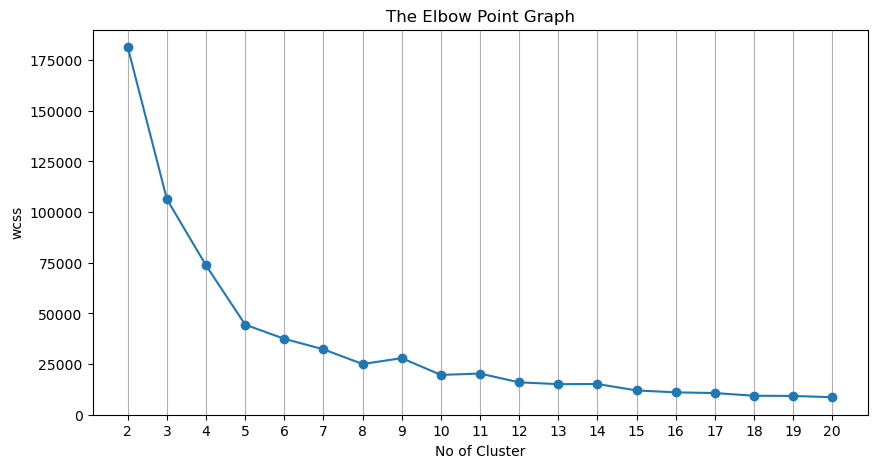

In [72]:
# plot an elbow graph
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)] ,wcss , marker = "o")
plt.title("The Elbow Point Graph")
plt.xlabel("No of Cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis = "x")
plt.show()

# Optimum Number of Clusters = 5

# Training the k-Means Clustering Mode

In [75]:
km = KMeans(n_clusters=5)
# return a label for each data point based on their cluster
Y = km.fit_predict(x)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 1 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 5 Clusters - 0, 1, 2, 3, 4

# Visualizing all the Clusters

C:\Users\ma516\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


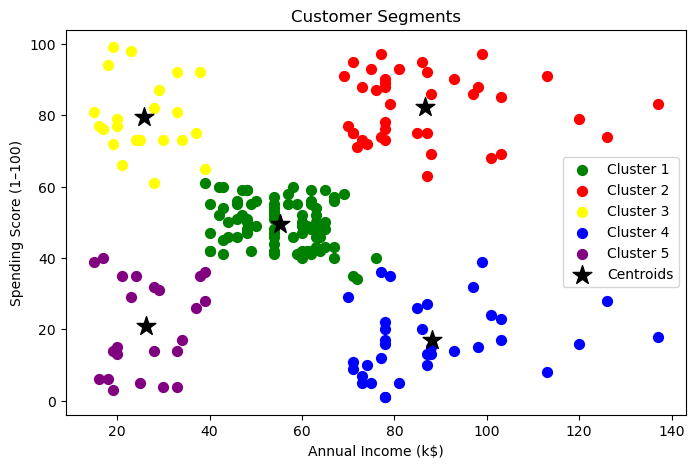

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(x)

# Plot clusters
plt.figure(figsize=(8,5))
plt.scatter(x[Y==0, 0], x[Y==0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1, 0], x[Y==1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2, 0], x[Y==2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3, 0], x[Y==3, 1], s=50, c='blue', label='Cluster 4')
plt.scatter(x[Y==4, 0], x[Y==4, 1], s=50, c='purple', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()
